# TP1 - Champ électrique

## ARGUELLO Camilo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, curve_fit
from IPython.display import display, Math

### A.3. Potentiel créé par un cercle chargé

In [2]:
### Constants

R = 1.5 # cm
x_1 = 2.5 # cm
V0 = 15 # volts

In [3]:
### Mesures

xs = np.array([ -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13 ]) # cm
Vs = np.array([ 15, 11, 9.8, 7.5, 6.5, 5.7, 5, 4.5, 4, 3.5, 3.4, 2.8, 2.5, 2.2, 1 ]) # volts

In [4]:
## 6

init_rho = xs - x_1
final_rho = [r for r in init_rho if r >= R]
final_Vs = [V for r, V in zip(init_rho, Vs) if r >= R]
ln_rho = [np.log(r / R) for r in final_rho]

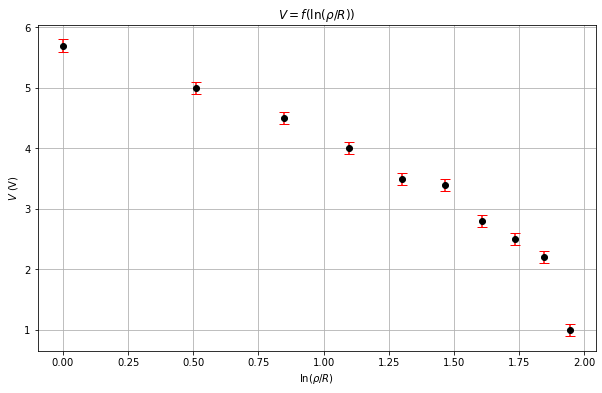

In [5]:
# Erreur
dVs = 0.1 # volts

# Plot
# On trace le graphique
plt.figure(figsize=(10, 6))
plt.errorbar(ln_rho, final_Vs, yerr=dVs, fmt='o', color='black', ecolor='red', capsize=5)
plt.xlabel(r'$\ln(\rho / R)$')
plt.ylabel(r'$V$ (V)')
plt.title(r'$V = f(\ln(\rho / R))$')
plt.grid()
plt.show()

Optimization terminated successfully.


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

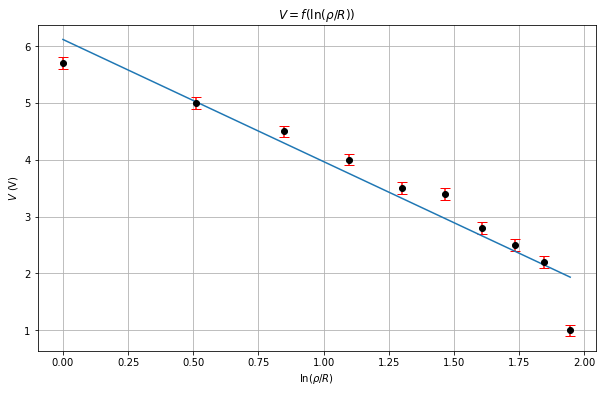

In [6]:
# Modèle

def f(params, x):
    Vr, V1 = params
    Vpred = Vr - np.array([V1 * xi for xi in x])
    return np.sum((Vpred - final_Vs) ** 2)

result = minimize(f, [15, 1], args=(ln_rho))

Vr, V1 = result.x   # Vr = Potentiel à l'infini
                    # V1 = Pente de la droite
print(result.message)
# display Vr et V1
display(Math(r'V_r = %.2f \, \text{V}' % Vr))
display(Math(r'V_1 = %.2f \, \text{V}' % V1))

x = np.linspace(min(ln_rho), max(ln_rho), 10)
y = Vr - V1 * x

# Rapport Vr et V0
rapport = Vr / V0
display(Math(r'\frac{V_r}{V_0} = %.2f' % rapport))

plt.figure(figsize=(10, 6))
plt.errorbar(ln_rho, final_Vs, yerr=dVs, fmt='o', color='black', ecolor='red', capsize=5)
plt.plot(x, y, label='Modèle')
plt.xlabel(r'$\ln(\rho / R)$')
plt.ylabel(r'$V$ (V)')
plt.title(r'$V = f(\ln(\rho / R))$')
plt.grid()
plt.show()

### B. Capacité du condensateur plan

In [7]:
# Constants 

e_0 = 8.85 * 10 ** -12 # F / m
S = 800 * 10 ** -4 # m^2
d = 4 / 1000 # m
alpha_bleu = 10 # nC / V
alpha_rouge = 100 # nC / V

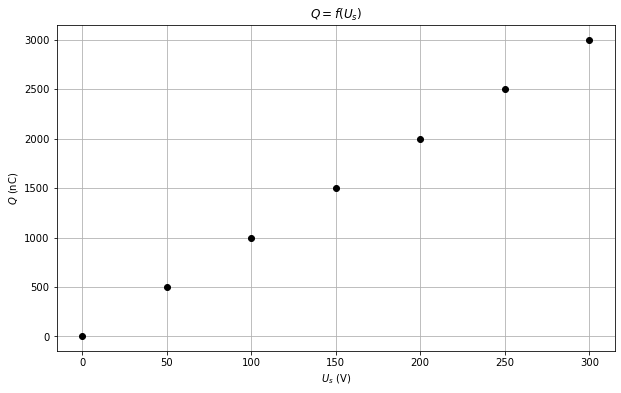

In [8]:
# 9
# Mesures

Us = np.array([ 0, 50, 100, 150, 200, 250, 300 ]) # V
Qs = alpha_bleu * Us # nC

plt.figure(figsize=(10, 6))
plt.plot(Us, Qs, 'o', color='black')
plt.xlabel(r'$U_s$ (V)')
plt.ylabel(r'$Q$ (nC)')
plt.title(r'$Q = f(U_s)$')
plt.grid()

Optimization terminated successfully.


<IPython.core.display.Math object>

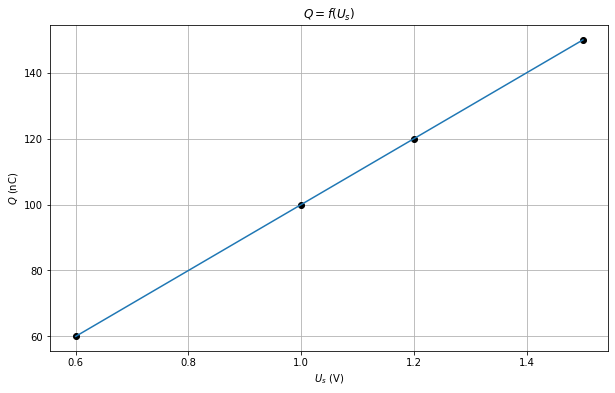

In [33]:
# Modèle
def f(params, x):
  C = params
  Qpred = C * x
  return np.sum((Qpred - Qs) ** 2)

result = minimize(f, [1], args=(Us))

print(result.message)

C = result.x[0]

display(Math(r'C = \, %.f \, \text{nF}' % C))

plt.figure(figsize=(10, 6))
plt.plot(Us, Qs, 'o', color='black')
plt.plot(Us, C * Us, label='Modèle')
plt.xlabel(r'$U_s$ (V)')
plt.ylabel(r'$Q$ (nC)')
plt.title(r'$Q = f(U_s)$')
plt.grid()
plt.show()

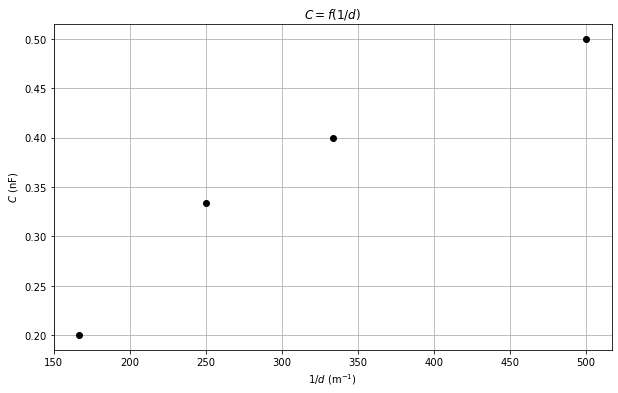

In [34]:
# 10.
Ui = 300 # Volts
ds = np.array([ 1, 2, 3, 4, 6 ]) / 1000 # m
Us = np.array([ 2.2, 1.5, 1.2, 1, .6 ]) # Volts

# On utilise ds[1:] à cause d'un biais dans d = 1 mm
ds = ds[1:]
Us = Us[1:]

# Module rouge
alpha_rouge_c = alpha_rouge * 10 ** -9 # C / V
Qs = alpha_rouge * Us

# C = Q / U
Cs = Qs / Ui

plt.figure(figsize=(10,6))
plt.plot(1/ds, Cs, 'o', color='black')
plt.xlabel(r'$1/d$ (m$^{-1}$)')
plt.ylabel(r'$C$ (nF)')
plt.title(r'$C = f(1/d)$')
plt.grid()
plt.show()


Optimization terminated successfully.


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

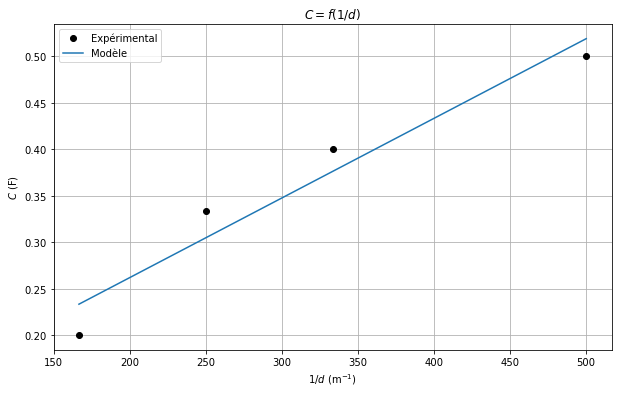

In [45]:
# Modèle
def f(params):
  e_0_est, C_para = params
  # De la forme : 
  # y_pred = a x + b
  Cpred = e_0_est * (1 / ds) + C_para
  return np.sum((Cpred - Cs) ** 2)

result = minimize(f, [1, 1])

print(result.message)
e_0_est, C_para = result.x

display(Math(r'\epsilon_0 = %.2e \, \text{F m}^{-1}' % e_0))
display(Math(r'\epsilon_0^{est} = %.2e \, \text{F m}^{-1}' % (e_0_est * 10 ** -9)))
display(Math(r'C_{para} = %.2e \, \text{F}' % (C_para * 10 ** -9)))

plt.figure(figsize=(10, 6))
plt.plot(1/ds, Cs, 'o', color='black', label='Expérimental')
plt.plot(1/ds, (C / ds) + C_para, label='Modèle')
plt.xlabel(r'$1/d$ (m$^{-1}$)')
plt.ylabel(r'$C$ (F)')
plt.title(r'$C = f(1/d)$')
plt.grid()
plt.legend()
plt.show()